<a href="https://colab.research.google.com/github/YayunEldina/PCVK_Ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

**1. Membuat Gamma Correction**

Gamma Correction pada citra
----------------------------------
Masukkan nilai kecerahan: 3


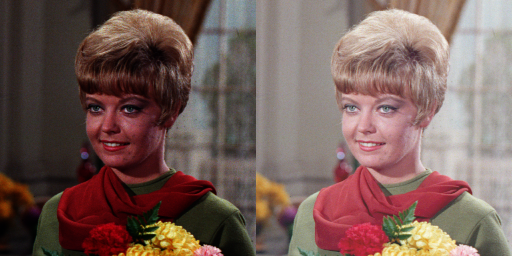

In [3]:
print('Gamma Correction pada citra')
print('----------------------------------')

# Get brightness input and calculate invGamma
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
    invGamma = 1.0 / brightness  # Calculate invGamma
except ValueError:
    print('Error, not a number')
    exit()

# Read the original image
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
gamma_corrected_image = np.zeros(original.shape, original.dtype)

# Apply gamma correction pixel by pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            # Apply gamma correction formula
            gamma_corrected_image[y, x, c] = np.clip(255 * (original[y, x, c] / 255) ** invGamma, 0, 255)

# Display the original and gamma-corrected images side by side
final_frame = cv.hconcat((original, gamma_corrected_image))
cv2_imshow(final_frame)


**2. Membuat Simulasi Image Depth**

Simulasi Image Depth pada citra
----------------------------------


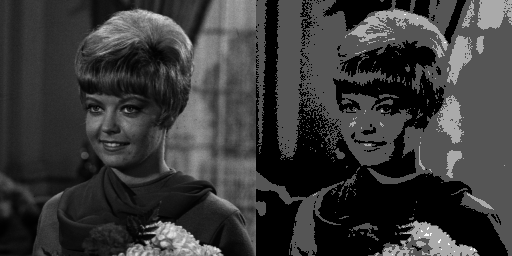

In [4]:
print('Simulasi Image Depth pada citra')
print('----------------------------------')

bit_depth = 2  # Set desired bit depth
level = 255 / (pow(2, bit_depth) - 1)

# Convert the original image to grayscale
original_gray = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original_gray.shape, original_gray.dtype)

# Apply the bit depth transformation
for y in range(original_gray.shape[0]):
    for x in range(original_gray.shape[1]):
        # Simulate image depth
        depth_value = np.round(original_gray[y, x] / level) * level
        depth_image[y, x] = np.clip(depth_value, 0, 255)

# Display the original and depth images side by side
final_frame = cv.hconcat((original_gray, depth_image.astype(np.uint8)))  # Ensure depth_image is uint8
cv2_imshow(final_frame)


**3. Membuat modul Average Denoising**

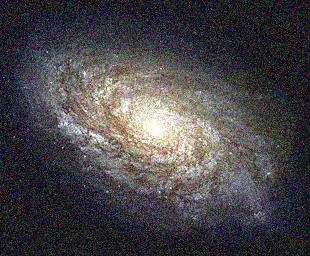

In [24]:
!pip install glob2
#Import the glob module
import glob

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 1, 1)
cv2_imshow(n)

In [48]:
import math

def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------------')
try:
  averageCitra = int(input('Masukan jumlah citra average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR: ')
print(result)


PSNR
------------------------------
Masukan jumlah citra average: 10
Nilai PSNR: 
30.180094156193185


a. Jumlah Citra di Average 5

Average 5
-----------------------------------
Nilai PSNR adalah 29.11892885977455 (dB)


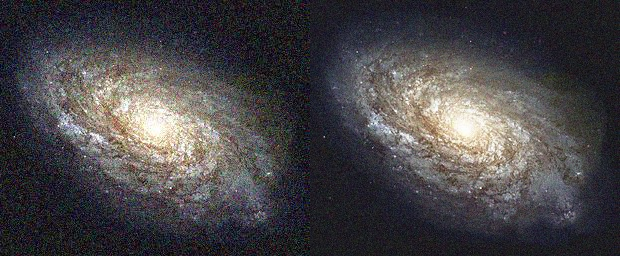

In [49]:
from math import log10, sqrt
from google.colab.patches import cv2

print('Average 5')
print('-----------------------------------')

dst = cv_img[0]
img_amount = 5

for i in range(1,img_amount):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(cv_img[0], compressed)

print('Nilai PSNR adalah', psnr, '(dB)')

# Concatenate original and compressed for comparison
galaxy_frame = cv.hconcat([cv_img[0], dst])
cv2_imshow(galaxy_frame)
cv.waitKey(0)
cv.destroyAllWindows()

b. Jumlah Citra di Average 10

Average 10
-----------------------------------
Nilai PSNR adalah 29.00018086828898 (dB)


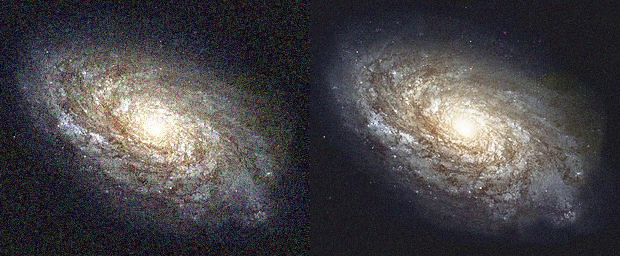

In [50]:
from math import log10, sqrt
from google.colab.patches import cv2

print('Average 10')
print('-----------------------------------')

dst = cv_img[0]
img_amount = 10

for i in range(1,img_amount):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(cv_img[0], compressed)

print('Nilai PSNR adalah', psnr, '(dB)')

# Concatenate original and compressed for comparison
galaxy_frame = cv.hconcat([cv_img[0], dst])
cv2_imshow(galaxy_frame)
cv.waitKey(0)
cv.destroyAllWindows()

c. Jumlah Citra di Average 20

Average 20
-----------------------------------
Nilai PSNR adalah 28.962852858870605 (dB)


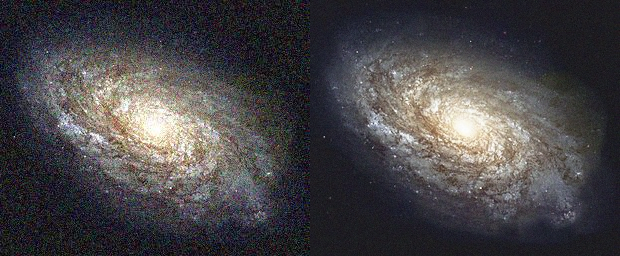

In [29]:
from math import log10, sqrt
from google.colab.patches import cv2

print('Average 20')
print('-----------------------------------')

dst = cv_img[0]
img_amount = 20

for i in range(1,img_amount):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(cv_img[0], compressed)

print('Nilai PSNR adalah', psnr, '(dB)')

# Concatenate original and compressed for comparison
galaxy_frame = cv.hconcat([cv_img[0], dst])
cv2_imshow(galaxy_frame)
cv.waitKey(0)
cv.destroyAllWindows()

d. Jumlah Citra Average 40

Average 40
-----------------------------------
Nilai PSNR adalah 28.916795959164162 (dB)


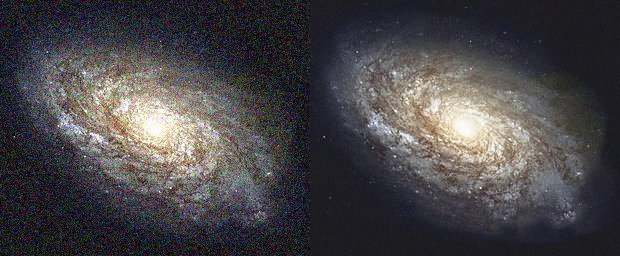

In [30]:
from math import log10, sqrt
from google.colab.patches import cv2

print('Average 40')
print('-----------------------------------')

dst = cv_img[0]
img_amount = 40

for i in range(1,img_amount):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(cv_img[0], compressed)

print('Nilai PSNR adalah', psnr, '(dB)')

# Concatenate original and compressed for comparison
galaxy_frame = cv.hconcat([cv_img[0], dst])
cv2_imshow(galaxy_frame)
cv.waitKey(0)
cv.destroyAllWindows()

e. Jumlah Citra Average 80

Nilai PSNR adalah 28.903465994592846 (dB)


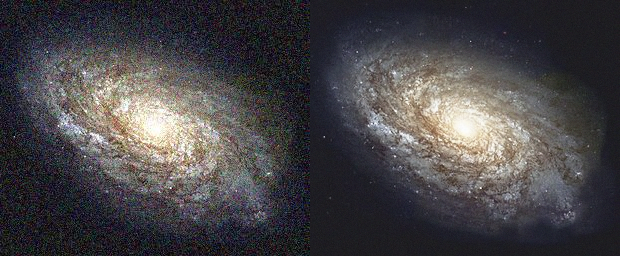

In [34]:
from math import log10, sqrt
from google.colab.patches import cv2

dst = cv_img[0]
img_amount = 80

for i in range(1,img_amount):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(cv_img[0], compressed)

print('Nilai PSNR adalah', psnr, '(dB)')

# Concatenate original and compressed for comparison
galaxy_frame = cv.hconcat([cv_img[0], dst])
cv2_imshow(galaxy_frame)
cv.waitKey(0)
cv.destroyAllWindows()

f. Jumlah Citra Average 100

Average 100
-----------------------------------
Nilai PSNR adalah 28.906415224870074 (dB)


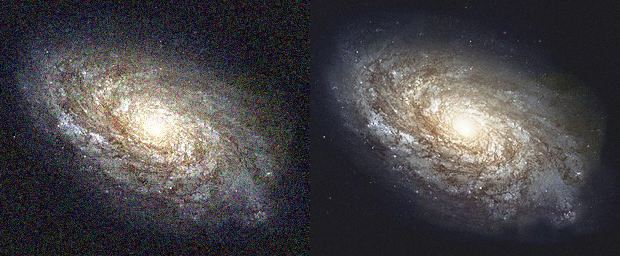

In [33]:
from math import log10, sqrt
from google.colab.patches import cv2

print('Average 100')
print('-----------------------------------')

dst = cv_img[0]
img_amount = 100

for i in range(1,img_amount):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(cv_img[0], compressed)

print('Nilai PSNR adalah', psnr, '(dB)')

# Concatenate original and compressed for comparison
galaxy_frame = cv.hconcat([cv_img[0], dst])
cv2_imshow(galaxy_frame)
cv.waitKey(0)
cv.destroyAllWindows()


**Kesimpulan**

Dari hasil PSNR yang diperoleh, dapat disimpulkan bahwa semakin banyak citra yang di-average, nilai PSNR cenderung sedikit menurun, yang menunjukkan bahwa kualitas gambar menurun dengan penambahan citra yang berlebihan. Namun, setelah menggunakan sekitar 80 citra, nilai PSNR menjadi stabil, dan menambahkan lebih banyak citra tidak memberikan peningkatan kualitas yang signifikan. Oleh karena itu, jumlah citra yang optimal untuk di-average adalah sekitar 10 hingga 20, karena pada titik ini hasil denoising terbaik tercapai sebelum kualitas gambar mulai menurun.

**4. Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP),
sedangkan image paling kanan adalah hasilnya:**

In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


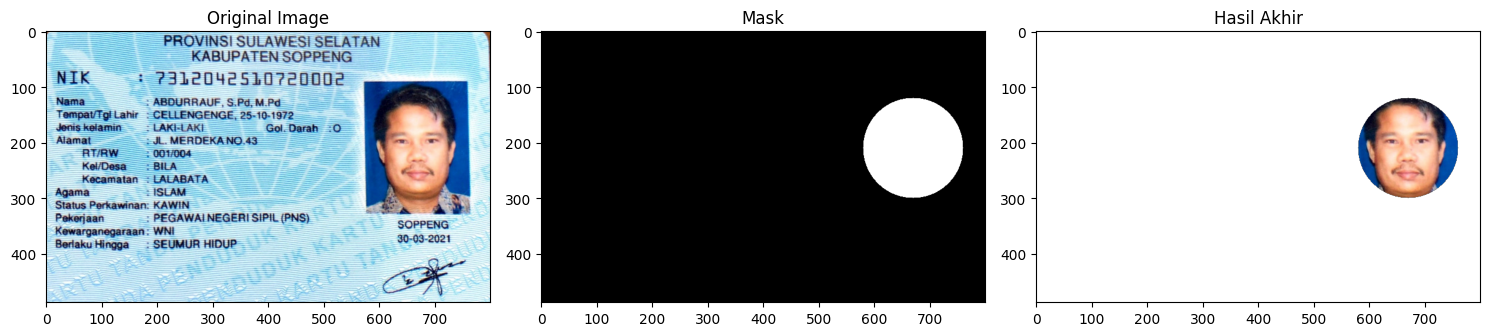

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = ('/content/drive/MyDrive/PCVK_MM/Images/KTP7.jpeg')
img = cv.imread(image_path)

mask = np.zeros(img.shape[:2], dtype="uint8")

cv.circle(mask, (670, 210), 90, 255, -1)

masked = cv.bitwise_and(img, img, mask=mask)

tmp = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)

_, alpha = cv.threshold(tmp, 0, 255, cv.THRESH_BINARY)

b, g, r = cv.split(masked)

rgba = [b, g, r, alpha]

result = cv.merge(rgba)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('on')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGRA2RGBA))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()

**Masking Kelompok 4**

Kelompok 4
-----------------------------------


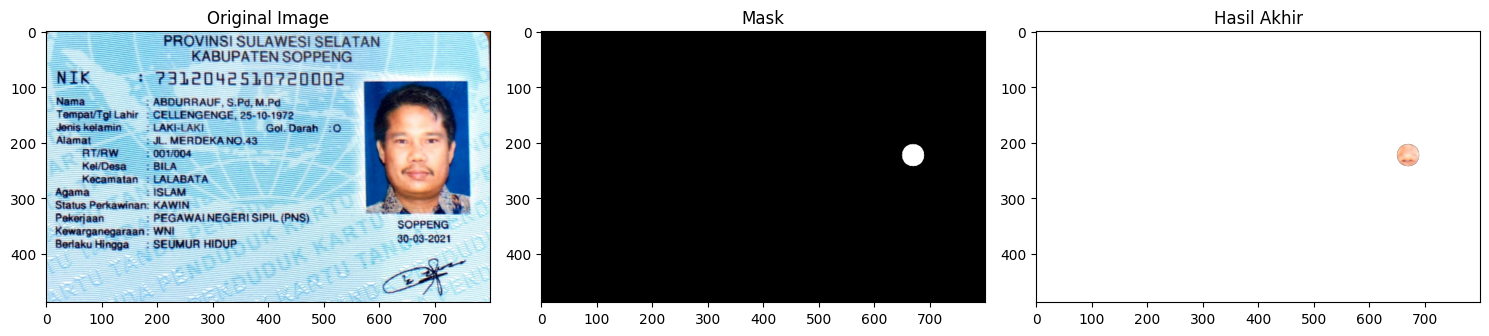

In [39]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

print('Kelompok 4')
print('-----------------------------------')

image_path = ('/content/drive/MyDrive/PCVK_MM/Images/KTP7.jpeg')
img = cv.imread(image_path)

mask = np.zeros(img.shape[:2], dtype="uint8")

cv.circle(mask, (670, 223), 20, 255, -1)

masked = cv.bitwise_and(img, img, mask=mask)

tmp = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)

_, alpha = cv.threshold(tmp, 0, 255, cv.THRESH_BINARY)

b, g, r = cv.split(masked)

rgba = [b, g, r, alpha]

result = cv.merge(rgba)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('on')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGRA2RGBA))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()


**5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.**

**NOT (komplemen)**

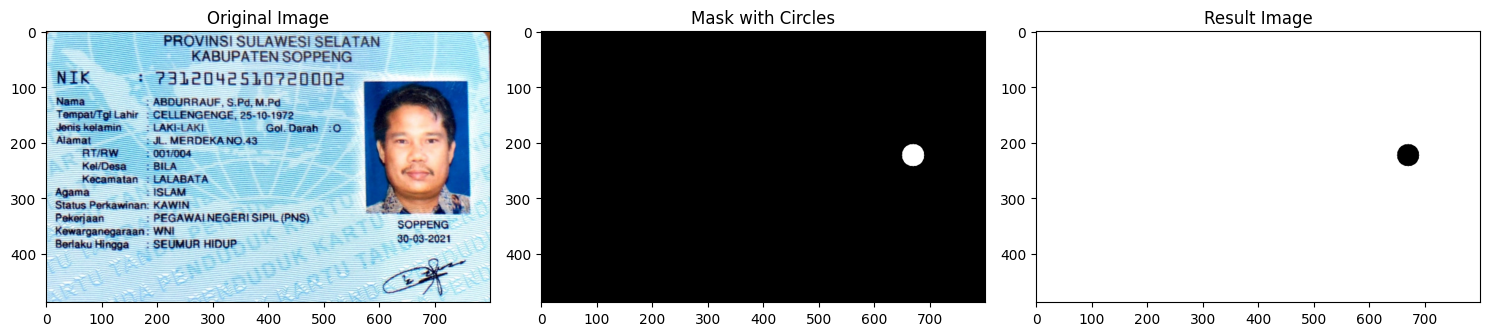

In [40]:
mask = np.zeros(img.shape[:2], dtype="uint8")

center_coordinates = (670, 223)
radius1 = 20
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates, radius1, color, thickness)

result = ~mask

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

**OR (Atau)**

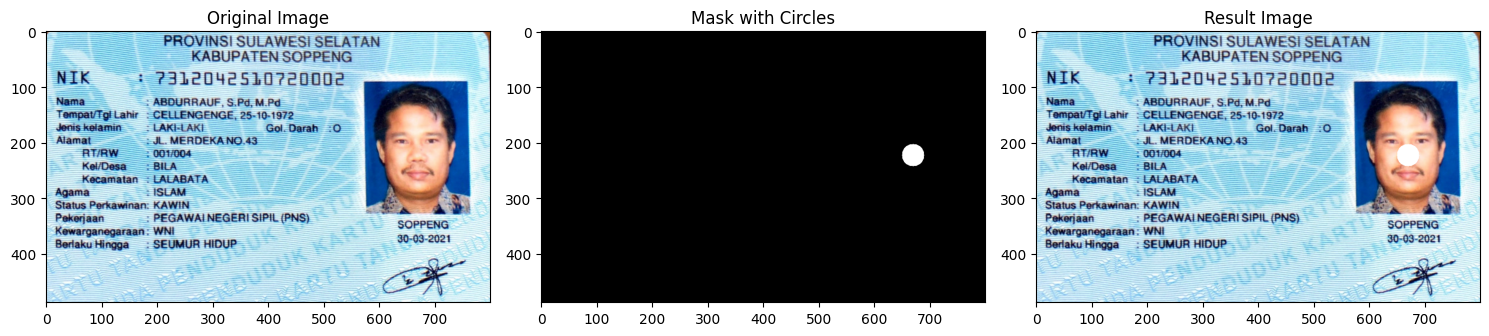

In [42]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/KTP7.jpeg')

mask = np.zeros_like(img)

center_coordinates = (670, 223)
radius1 = 20
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates, radius1, color, thickness)

result = img | mask

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

**AND (Dan)**

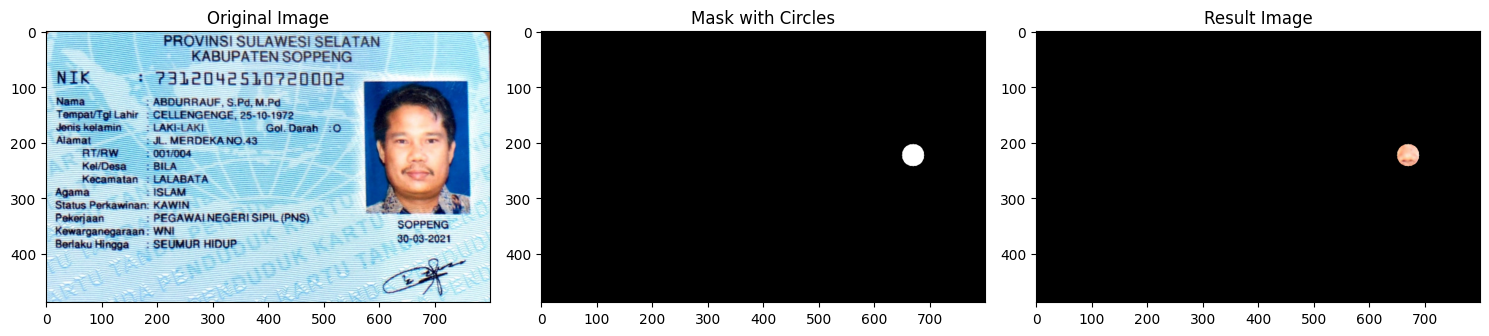

In [43]:
mask = np.zeros_like(img)

center_coordinates = (670, 223)
radius1 = 20
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates, radius1, color, thickness)

result = img & mask

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

**NAND (Not And)**

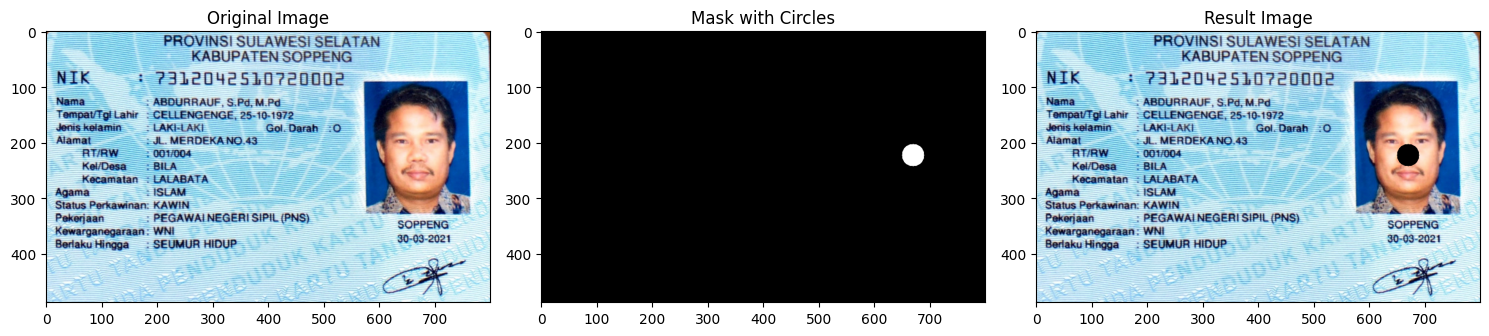

In [44]:
mask = np.zeros_like(img)

center_coordinates = (670, 223)
radius1 = 20
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates, radius1, color, thickness)

result = img & ~mask

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

**XOR**

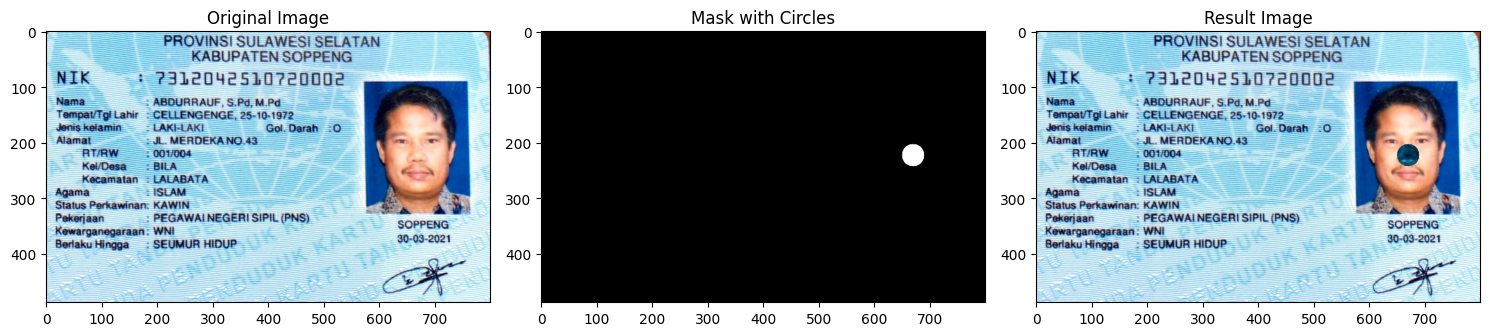

In [45]:
mask = np.zeros_like(img)

center_coordinates = (670, 223)
radius1 = 20
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates, radius1, color, thickness)

result = img ^ mask

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()